### Install the necessary packages

In [1]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 6.8 MB/s eta 0:00:00


### Import Packages

In [3]:
# import the necessary packages
from matplotlib import pyplot as plt
from easyocr import Reader
import argparse
import cv2

In [4]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Using EasyOCR for Optical Character Recognition

In [5]:
def cleanup_text(text):
	# strip out non-ASCII text so we can draw the text on the image
	# using OpenCV
	return "".join([c if ord(c) < 128 else "" for c in text]).strip()

In [11]:
# construct the argument parser and parse the arguments
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "image filename", #add the image filepath
	"langs": "en,ar",
	"gpu": -1
}

<Figure size 400x400 with 0 Axes>

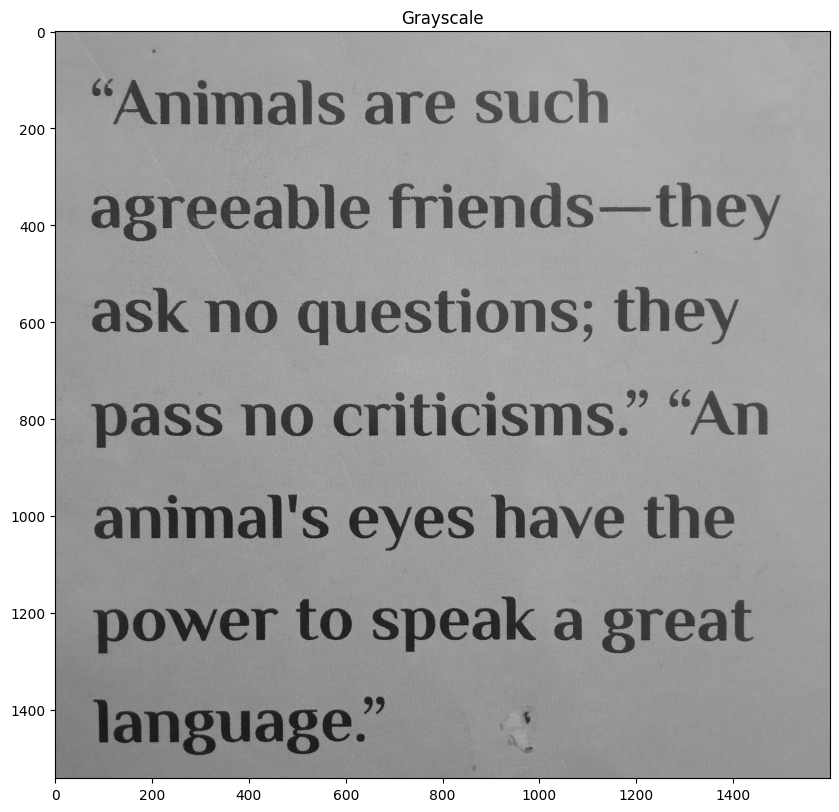

In [15]:
# load the input image from disk
image = cv2.imread(args["image"])
plt.figure(figsize=(4,4))
#plt.grid(False)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt_imshow("Grayscale", gray)


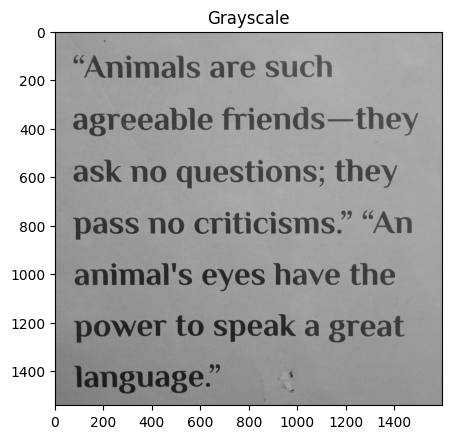

[INFO] OCR'ing with the following languages: ['en', 'ar']
[INFO] OCR'ing input image...
[INFO] 0.6864:  Animals are such
[INFO] 0.7365: agreeable friends -they
[INFO] 0.5606: ask no questions; they
[INFO] 0.9973: 99
[INFO] 0.4622: pass no criticisms '
[INFO] 0.2080:  An
[INFO] 0.5560: animals eyes have the
[INFO] 0.7179: power to speak a great
[INFO] 0.8290: language "


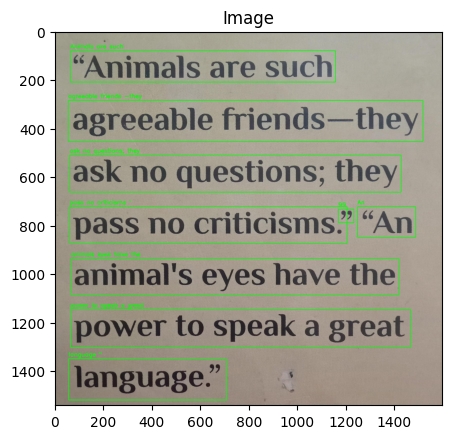

In [17]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.figure(figsize=(5,5)) #set the figure size
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()
# ### Using EasyOCR for Optical Character Recognition
def cleanup_text(text):
	# strip out non-ASCII text so we can draw the text on the image
	# using OpenCV
	return "".join([c if ord(c) < 128 else "" for c in text]).strip()
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required=True,
#	help="path to input image to be OCR'd")
#ap.add_argument("-l", "--langs", type=str, default="en",
#	help="comma separated list of languages to OCR")
#ap.add_argument("-g", "--gpu", type=int, default=-1,
#	help="whether or not GPU should be used")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "image1.jpg",
	"langs": "en,ar",
	"gpu": -1
}

# load the input image from disk
image = cv2.imread(args["image"])


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt_imshow("Grayscale", gray)

# break the input languages into a comma separated list
langs = args["langs"].split(",")
print("[INFO] OCR'ing with the following languages: {}".format(langs))

# load the input image from disk
image = cv2.imread(args["image"])

# OCR the input image using EasyOCR
print("[INFO] OCR'ing input image...")
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
reader = Reader(langs, gpu=args["gpu"] > 0)
results = reader.readtext(image)
# loop over the results
for (bbox, text, prob) in results:
	# display the OCR'd text and associated probability
	print("[INFO] {:.4f}: {}".format(prob, text))

	# unpack the bounding box
	(tl, tr, br, bl) = bbox
	tl = (int(tl[0]), int(tl[1]))
	tr = (int(tr[0]), int(tr[1]))
	br = (int(br[0]), int(br[1]))
	bl = (int(bl[0]), int(bl[1]))

	# cleanup the text and draw the box surrounding the text along
	# with the OCR'd text itself
	text = cleanup_text(text)
	cv2.rectangle(image, tl, br, (0, 255, 0), 2)
	cv2.putText(image, text, (tl[0], tl[1] - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# show the output image
plt_imshow("Image", image)
